# Método: Descenso del Gradiente

El algoritmo de descenso de gradiente estima numéricamente dónde se encuentran los mínimos locales de una función. En lugar de encontrar mínimos manipulando símbolos (estableciendo $\nabla f = 0$), el descenso de gradiente aproxima la solución con números. Además no requiere ninguna fórmula.

### Ejemplo
Consideremos la función:
$$ f(x) = \frac {x^2 \cos(x) - x} {10} $$

<img src="images/fig1.png" />

En la figura 2, podemos apreciar que si elegimos $x_{0} = 6$ y $\alpha = 0.2$, el descenso de gradiente se mueve desde el primer punto es $x_{0}$ hasta converger al mínimo cerca de $x = 4$ después de solo 10 pasos.

<img src="images/fig2.png" />

Pero, Si usamos el mismo $x_{0}$ y establecemos un valor $\alpha = 1.5$, el algoritmo no logra encontrar el mínimo. Por tanto una de las limitaciones del algortimo es precisamente el escoger un $\alpha$ acorde  pues un valor muy grande podría no converger (o hacerlo de manera muy lenta) y un valor muy pequeño podria tomar mas pasos de los necesarios y hacer el proceso casi imposible de evaluar.

Entre las limitaciones del método tenemos:
 - sólo encuentra mínimos locales
 - sólo funciona cuando la derivada de la función es continua


## Descenso del Gradiente Simple
Sea el problema de optimización:

$$ \argmin\limits_{x}\, f(x) $$

Donde *f* es una función continua y dos veces continuamente derivable.

Luego, sea $x^{t}$ el punto actual. Entonces el vector:

$$p^{t} = - \nabla f(x^{t})$$

es una dirección de descenso. O sea, satisface:

$$P^{\top} \nabla f(x^{t}) < 0$$

El punto $x^{t+1}$ se obtiene mediante:
$$x^{t+1} = x^{t} - \alpha \nabla f^{t}$$

donde $\alpha$ es el tamaño de paso y para una $\alpha$ sufientemente pequeña se garantiza:

$$f(x^{t} - \alpha \nabla f^{t}) < f^{t}$$

si

$$\nabla f^{t} = 0$$

### Algoritmo

- Inicializar valor para $\alpha$ y $x_{0}$
- Repetir para cada *i < máximo de iteraciones*
- &emsp;Si $|| \nabla f(x_{i})|| < error$ o *i == máximo de iteraciones* entonces detener y retornar $x_{i}$
- &emsp;$x_{i+1} = x_{i} - \alpha \nabla f(x_{i})$
- &emsp;$i++$

### Implementación en Python

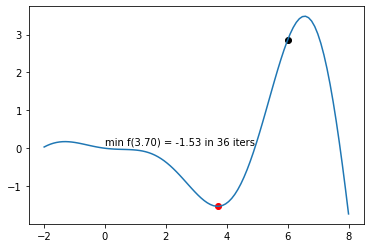

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fn = lambda x: (x**2 * np.cos(x) - x) / 10
grad = lambda x: (2*x * np.cos(x) - x**2 * np.sin(x) - 1) / 10

def descenso_gradiente(fn, x0, alpha, error, max_iter):
    grad = lambda x, delta: (fn(x + delta) - fn(x - delta)) / (2 * delta)
    delta = 0.00001
    x = x0
    i = 1
    while i < max_iter:
        if grad(x, delta) < error:
            return x, i
        x = x - alpha * grad(x, delta)
        i += 1

    return x, max_iter

min, iter = descenso_gradiente(fn, x0 = 6, alpha = 0.2, error = 0.000001, max_iter=1000000)

x = np.linspace(-2, 8, 100)
plt.plot(x, fn(x))
plt.scatter(6, fn(6), color="black")
plt.scatter(min, fn(min), color="red")
plt.text(0, .1, f'min f({min:.2f}) = {fn(min):.2f} in {iter} iters')
plt.show()


## Descenso del Gradiente Estocástico

Considermos una variante del problema general, uno cuya función objetivo (costo) se pueda denotar como la suma de muchos pequeñas funciones (o costos). O sea:

$$ \argmin\limits_{x}\, f(x) = \frac{1}{|\Omega|}\,\sum_{i \in \Omega} {f_{i}(x)} $$

En este caso, la dirección de descenso de gradiente esta dado por la ecuación:

$$ p^{t} = - \nabla f^{t} = - \frac{1}{|\Omega|}\,\sum_{i \in \Omega} \nabla {f^{t}_{i}} $$

Nótese que: $p^t$ puede ser interpretado como el valor esperado (promedio sobre toda la población). Esto es:

$$ p^t = - \Epsilon \{ \nabla f^t_{i} \}\,\,\,\,para\,\,i = 1, 2, ..., \Omega $$

donde $|\Omega|$ denota la cardinalidad en el conjunto $\Omega$.

En cada iteración, la suma se realiza sobre una muestra en lugar de utilizar toda la población. De ahí el término **Estocástico**. 

$$ S^t \subset \Omega $$

Luego

$$ \tilde p^{t} = - \nabla f^{t} = - \frac{1}{|S^t|}\,\sum_{i \in S^t} \nabla {f^{t}_{i}} $$

Lo cual es equivalente a calcular el gradiente como el promedio de los gradientes de la muestra.

#### Ventajas:

- Si la función objetivo es la suma de de costos individuales (errores) sobre un conjunto muy grande de datos. La muestra suele ser representativa y producir un valor muy cercano al de la población.

- Se reduce el número de cálculos en cada iteración.

- Cuando hay datos atípicos (outliers), las muestras pueden ser robustas a esas “pocas” grandes desviaciones (salvo en aquellas muestras que sean incluidos, que se esperan sean pocas).

- Si la función objetivo es (ruidosa, tiene muchos mínimos locales pequeños). El gradiente estocástico permite suavizar la función objetivo y reduce el riesgo de tener una convergencia temprana.

#### Desventajas:

- El efecto de los outliers en el gradiente de una muestra puede afectar mas fuertemente y desviar al algoritmo de su trayectoria de convergencia.

### Algoritmo

- Inicializar valor para $\alpha$ y vector $\theta$
- Repetir para cada *i < máximo de iteraciones*
- &emsp;Se toma al azar una muestra t
- &emsp;$ \theta = \theta - \alpha \nabla f(\theta, t)$
- &emsp;Si $|| \nabla f(\theta, t)|| < error$ entonces detener y retornar $\theta$

### Implementación en Python

In [2]:
import re
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def mse(theta:np.ndarray, x:np.ndarray, y: np.ndarray) -> float:
    y1 = np.dot(x, theta)
    return np.sum((y1 - y) ** 2) / y.shape[0]

def mse_gradient(theta:np.ndarray, x:np.ndarray, y: np.ndarray, debug: bool = False) -> np.ndarray:
    y1 = np.dot(x, theta)
    return np.dot(np.transpose(x), (y1 - y)) * (2 / y.shape[0])

def descenso_gradiente_estocastico(
    x: np.ndarray,
    y: np.ndarray,
    fn: Callable = mse,
    grad_fn: Callable = mse_gradient,
    alpha: float = 0.005,
    error: float = 0.001,
    max_iter: int = 10000,
    sample_size: int = 10
):
    rows, cols = x.shape
    theta = np.ones((cols + 1, 1))
    x0 = np.ones(rows)
    tmp_x = np.column_stack((x0, x))
    current_error = np.Inf

    for iter in range(max_iter):
        np.random.seed(iter)
        indexes = np.random.permutation(sample_size)
        smp_x = tmp_x[indexes]
        smp_y = y[indexes]
        grad = grad_fn(theta, smp_x, smp_y)
        theta = theta - alpha * grad
        current_error = abs(np.sum(grad_fn(theta, smp_x, smp_y)))
        if current_error <= error:
            return theta, iter, current_error
        
    return theta, max_iter, current_error

In [4]:
x = np.random.normal(0, 1, (100, 10))
y = np.random.normal(0, 1, (100, 1))
thetas, iters, error = descenso_gradiente_estocastico(x, y, alpha=0.005, max_iter=100000, sample_size=32)
print(thetas, iters, error)

[[ 0.00884801]
 [ 0.09379821]
 [-0.12939073]
 [ 0.3803715 ]
 [ 0.16291407]
 [ 0.01009834]
 [ 0.0260969 ]
 [ 0.03073639]
 [-0.20214081]
 [-0.2900198 ]
 [-0.08458914]] 1389 0.0009935359958802388
